# Filter Bank Common Spatial Pattern
Attempt at implementing filter-bank common spatial filter (FBCSP) on BCI Competition IV 2a Dataset
  
**References:**   

[1] Kai Keng Ang, Zheng Yang Chin, Haihong Zhang and Cuntai Guan, "Filter Bank Common Spatial Pattern (FBCSP) in Brain-Computer Interface," 2008 IEEE International Joint Conference on Neural Networks (IEEE World Congress on Computational Intelligence), Hong Kong, 2008, pp. 2390-2397, doi: 10.1109/IJCNN.2008.4634130.    
[2] Ang, K. K., Chin, Z. Y., Wang, C., Guan, C., & Zhang, H. (2012). Filter Bank Common Spatial Pattern Algorithm on BCI Competition IV Datasets 2a and 2b. Frontiers in Neuroscience, 6. doi: 10.3389/fnins.2012.00039

# BCI Competition IV Dataset 2a (.npz data)
Information Given in Documentation

From the documentation it is known that:
* 25 electrodes are used, first 22 are EEG, last 3 are EOG
* Sampling frequency (fs) is 250Hz
* 9 subjects
* 9 run (run 1-3 are for eye movement, run 4-9 is MI)  
  

**-- Time Duration--**  
1 trials                          = 7-8s  
1 run              = 48 trials    = 336-384s  
1 session = 6 runs = 288 trials   = 2016-2304s

About the recording of eye movement
* run 1 => 2 mins with eyes open
* run 2 => 1 min with eyes closed
* run 3 => 1 min with eye movements

![timing-scheme-paradigm.png](./img/timing-scheme-paradigm.png) 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading dataset

In [1]:
# First import the data

# Number of subject, n + 1 for iteration purpose (there are 9 subjects)
ns = 10

# Creating dict to store original data and modified data
# ori_data will serve as initial loaded data that will remain unchanged
ori_data = dict()
mod_data = dict() 

In [2]:
# function to count subject
def subjectCounter(i):
    return 'subject0{}'.format(i)

In [5]:
# Iter over all data path then store them in sub0X variable
for i in range(1, ns):
    data_path = '../../datasets/BCICIV2a/A{:02d}T.npz'.format(i)
    subj = subjectCounter(i)
    
    # Load EEG data from datapath and store into subj0X variabel then store into ori_dict
    # Then also fetch 's' (EEG data) into mod_data
    ori_data[subj] = np.load(data_path)
    mod_data[subj] = {}
    mod_data[subj]['raw_EEG'] = ori_data[subj]['s']
    
    # Remove last three EOG electrodes
    mod_data[subj]['raw_EEG'] = np.delete(mod_data[subj]['raw_EEG'], np.s_[22:], 1)

In [6]:
# Load the training data of all subjects

# Iter over all data path then store them in sub0X variable
for i in range(1, ns):
    data_path = '../../datasets/BCICIV2a/A{:02d}T.npz'.format(i)
    subject = 'subject{:02d}'.format(i)
    
    # Load EEG data from datapath and store into subj0X variabel then store into data dictionary
    ori_data[subject] = np.load(data_path)

In [7]:
# Peek into ori_data type and its keys 
print(type(ori_data['subject01']))
print(ori_data['subject01'].files)

<class 'numpy.lib.npyio.NpzFile'>
['s', 'etyp', 'epos', 'edur', 'artifacts']


In [13]:
ori_data['subject01']['artifacts'].ravel()[20:50]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

Explanation regarding contents of the keys inside each subject data:
* **s**: 's' contains continuous time-series recorded EEG signals are, shape of M x N array. Size may vary between subjects but N is fixed to 25, indicates 25 electrodes with 22 first EEG and 3 last EOG
* **etype**: 'etyp' stands for event type which indicate event occurence, event code will be describe in subsequent table
* **epos**: 'epos' stands for event position, denoting corresponding event begins at n-th sample at **'s'**
* **edur**: 'edur' stands for event duration, denoting duration of corresponding event
* **artifacts**: size of 288 x 1, 288 comes form 6 x 48, 6 runs where @run has 48 trials, @class has 12 trials

In [14]:
# ori_data will contain original data that is the raw file
# mod_data will contain modified original data

In [15]:
# Initialize 'subject0x' dict inside mod_data
for i in range(1, ns):
    subj = subjectCounter(i)
    mod_data[subj] = {}
    
mod_data

{'subject01': {},
 'subject02': {},
 'subject03': {},
 'subject04': {},
 'subject05': {},
 'subject06': {},
 'subject07': {},
 'subject08': {},
 'subject09': {}}

In [16]:
# Peek into different shape of recorded data/'s' between subjects
print('Sample\tElectrodes')
for i in range(1, ns):
    subj_temp = subjectCounter(i)
    print(ori_data[subj_temp]['s'].shape)

Sample	Electrodes
(672528, 25)
(677169, 25)
(660530, 25)
(600915, 25)
(686120, 25)
(678980, 25)
(681071, 25)
(675270, 25)
(673328, 25)


In [17]:
# First extract the sample data from ori_data into mod_data
for i in range(1, ns):
    subj = subjectCounter(i)
    mod_data[subj]['raw_EEG'] = ori_data[subj]['s']

In [18]:
# Visualizing sample_data inside subject01
# You can see that it has 25 electrodes stored in columns
pd.DataFrame(mod_data['subject01']['raw_EEG']).head()

0          1          2          3          4          5   \
0 -21.142578 -23.681641 -21.484375 -25.146484 -25.732422 -27.929688   
1 -21.923828 -23.925781 -24.316406 -25.341797 -26.074219 -25.244141   
2 -15.625000 -19.726562 -18.847656 -21.582031 -20.751953 -21.728516   
3 -16.699219 -13.720703 -20.361328 -20.849609 -24.169922 -22.021484   
4 -19.335938 -17.626953 -20.410156 -26.464844 -27.392578 -29.882812   

          6          7          8          9   ...         15         16  \
0 -14.550781 -22.509766 -25.439453 -28.710938  ... -30.615234 -29.638672   
1 -16.064453 -22.753906 -28.320312 -29.248047  ... -31.054688 -30.712891   
2 -12.451172 -20.410156 -23.730469 -25.927734  ... -28.759766 -28.417969   
3 -10.986328 -16.357422 -25.585938 -24.951172  ... -27.783203 -28.857422   
4  -9.277344 -18.359375 -24.609375 -30.517578  ... -31.884766 -33.740234   

          17         18         19         20         21         22  \
0 -26.660156 -20.947266 -25.439453 -24.902344 -19.677734  31.738281   
1 -26.123047 -22.998047 -27.099609 -26.367188 -23.339844  22.460938   
2 -24.462891 -21.386719 -25.097656 -24.267578 -21.484375  33.691406   
3 -25.537109 -19.335938 -24.316406 -24.511719 -17.919922  41.992188   
4 -32.666016 -18.554688 -26.611328 -28.466797 -18.408203  37.109375   

          23         24  
0 -13.671875 -43.945312  
1 -13.183594 -40.527344  
2  -8.300781 -38.574219  
3  -7.324219 -38.574219  
4 -15.136719 -49.804688  

[5 rows x 25 columns]

## Bandpass Filtering
The first stage employing a filter bank is to decompose EEG into multiple frequency pass band, using causal Chebysev Type II filter/ Butterworth Filter.  
A total of 9 band-pass filters are used, namely, 4-8, 8-12, ... 36-40 Hz  
These frequency ranges are used because they yielf a stable frequency response and cover range of 4-40 Hz

In [19]:
# Band pass filter with butterworth filter
from scipy.signal import butter, lfilter
from scipy.signal import freqz

In [20]:
def butter_bandpass_filter(signal, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    b,a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, signal)
    
    return y, b, a

### Practice
Create arbitrary signal and using butterworth signal as band-pass filter

In [23]:
# INPUT
# sampling frequency
fs = 500

# time
t = np.arange(0, 5, 1/fs)

# Three signals with various freq
x1 = np.sin(2 * np.pi * 6 * t)
x2 = np.sin(2 * np.pi * 7 * t)
x3 = np.sin(2 * np.pi * 50 * t)
x = x1 + x2 + x3

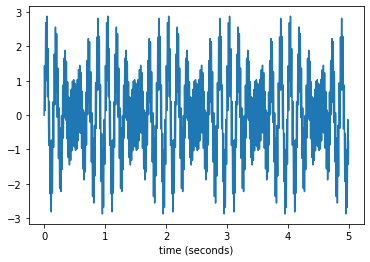

In [26]:
# Plot input
plt.figure()
plt.clf()
plt.plot(t, x)
plt.xlabel('time (seconds)')
plt.show()

In [24]:
# OUTPUT
lowcut = 4
highcut = 8
y, b, a = butter_bandpass_filter(x, lowcut, highcut, fs, order=5)

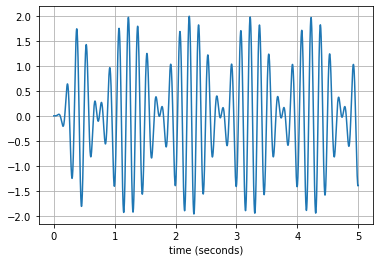

In [25]:
# Plot output
plt.figure()
plt.clf()
plt.plot(t, y, label='Filtered signal (%g Hz)' %fs)
plt.xlabel('time (seconds)')
plt.grid(True)
plt.show()